In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [28]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int

    sr : float   # strike rate
    bpb : float   # boundary per ball
    bper : float    # boundary percentage

    summary : str

In [29]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls']) * 100

    return {'sr' : sr}

In [30]:
def calculate_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb' : bpb}

In [31]:
def calculate_bper(state : BatsmanState):
    bper = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100

    return {'bper' : bper}

In [32]:
def summary(state: BatsmanState) -> BatsmanState:
    sum1 = f"""
Strike rate - {state['sr']}\n
Balls per boundary - {state['bpb']}\n
Boundary percent - {state['bper']}
"""
    
    state['summary'] = sum1

    return state

In [33]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_bper", calculate_bper)
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("summary", summary)

graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_bper")
graph.add_edge(START, "calculate_sr")

graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_bper", "summary")
graph.add_edge("calculate_sr", "summary")

graph.add_edge("summary", END)

workflow = graph.compile()

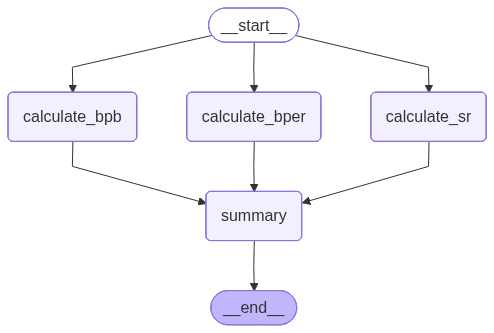

In [34]:
graph.compile()

In [37]:
initial_state = {
    'runs' : 100,
    'balls' : 50,
    'fours' : 6,
    "sixes" : 4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'bper': 48.0,
 'summary': '\nStrike rate - 200.0\n\nBalls per boundary - 5.0\n\nBoundary percent - 48.0\n'}

In [ ]:
print(final_state["summary"]) 


Strike rate - 200.0

Balls per boundary - 5.0

Boundary percent - 48.0

